In [1]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from autocorrect import Speller
from nltk.corpus import stopwords
import re
import string
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [43]:
resume = """Summary:
Experienced Kitchen Manager with over 4 years of experience in the culinary industry. Possessing a 2-year degree from an accredited university in Culinary Arts, Hotel and Restaurant Management, or related major. Proven track record in managing daily kitchen operations, leading staff, and maintaining food standards to achieve overall success of the kitchen. Strong problem-solving and leadership skills, and a passion for providing exceptional customer service.

Education:

    High school diploma or GED
    2-year degree in Culinary Arts, Hotel and Restaurant Management, or related major from an accredited university

Experience:

    4 years experience in the culinary, food and beverage, or related professional area

Key Responsibilities:

    Manages kitchen shift operations and ensures compliance with all Food & Beverage policies, standards and procedures.
    Estimat daily production needs and communicates needs to kitchen personnel
    Prepares and cooks food of all types
    Maintains purchasing, receiving and food storage standards
    Ensures compliance with food handling and sanitation standards
    Supervises and coordinates activities of cooks and other kitchen staff
    Leads shifts while personally preparing food items
    Utilizes interpersonal and communication skills to lead and inspire the team
    Provides excellent customer service
    Achieves and exceeds culinary and budget goals
    Trains employees in safety procedures
    Manages and conducts human resource activities such as hiring, scheduling, and evaluating performance

Skills:

    Strong leadership and problem-solving skills
    Passion for providing exceptional customer service
    Knowledge of culinary techniques and food presentation
    Knowledge of purchasing, receiving and food storage standards
    Strong time management skills
    Strong communication and interpersonal skills
    Knowledge of labor management systems
    Knowledge of food handling and sanitation standards

Certifications:

    ServSafe certification
    Food Handlers certification
"""

In [57]:
jobdesc = '''
Job Summary

Accountable for overall success of the daily kitchen operations. Exhibits culinary talents by personally performing tasks while leading the staff and managing all food related functions. Works to continually improve guest and employee satisfaction while maintaining the operating budget. Supervises all kitchen areas to ensure a consistent, high quality product is produced. Responsible for guiding and developing staff including direct reports. Must ensure sanitation and food standards are achieved.
Education and Experience
• High school diploma or GED; 4 years experience in the culinary, food and beverage, or related professional area.
• 2-year degree from an accredited university in Culinary Arts, Hotel and Restaurant Management, or related major; 2 years experience in the culinary, food and beverage, or related professional area.

Ensuring Culinary Standards and Responsibilities are Met
• Manages kitchen shift operations and ensures compliance with all Food & Beverage policies, standards and procedures.
• Estimates daily production needs on a weekly basis and communicates production needs to kitchen personnel daily.
• Assists Executive Chef with all kitchen operations and preparation.
• Prepares and cooks foods of all types, either on a regular basis or for special guests or functions.
• Develops, designs, or creates new applications, ideas, relationships, systems, or products, including artistic contributions.
• Assists in determining how food should be presented and creates decorative food displays.
• Maintains purchasing, receiving and food storage standards.
• Ensures compliance with food handling and sanitation standards.
• Performs all duties of kitchen managers and employees as necessary.
• Recognizes superior quality products, presentations and flavor.
• Ensures compliance with all applicable laws and regulations.
• Follows proper handling and right temperature of all food products.
• Operates and maintains all department equipment and reports malfunctions.
• Checks the quality of raw and cooked food products to ensure that standards are met.

Leading Kitchen Operations
• Supervises and coordinates activities of cooks and workers engaged in food preparation.
• Leads shifts while personally preparing food items and executing requests based on required specifications.
• Utilizes interpersonal and communication skills to lead, influence, and encourage others; advocates sound financial/business decision making; demonstrates honesty/integrity; leads by example.
• Encourages and builds mutual trust, respect, and cooperation among team members.
• Serves as a role model to demonstrate appropriate behaviors.
• Maintains the productivity level of employees.
• Ensures employees understand expectations and parameters.
• Establishes and maintains open, collaborative relationships with employees and ensures employees do the same within the team.
• Ensures property policies are administered fairly and consistently.
• Communicates performance expectations in accordance with job descriptions for each position.
• Recognizes success performance and produces desired results.

Ensuring Exceptional Customer Service
• Provides services that are above and beyond for customer satisfaction and retention.
• Manages day-to-day operations, ensuring the quality, standards and meeting the expectations of the customers on a daily basis.
• Sets a positive example for guest relations.
• Empowers employees to provide excellent customer service.
• Interacts with guests to obtain feedback on product quality and service levels.
• Handles guest problems and complaints.

Maintaining Culinary Goals
• Achieves and exceeds goals including performance goals, budget goals, team goals, etc.
• Develops specific goals and plans to prioritize, organize, and accomplish your work.
• Utilizes the Labor Management System to effectively schedule to business demands and for tracking of employee time and attendance.
• Trains employees in safety procedures.

Managing and Conducting Human Resource Activities
• Identifies the developmental needs of others and coaching, mentoring, or otherwise helping others to improve their knowledge or skills.
• Improves service by communicating and assisting individuals to understand guest needs, providing guidance, feedback, and individual coaching when needed.
• Participates in the employee performance appraisal process, providing feedback as needed.
• Brings issues to the attention of the department manager and Human Resources as necessary.

Additional Responsibilities
• Provides information to supervisors, co-workers, and subordinates by telephone, in written form, e-mail, or in person.
• Analyzes information and evaluating results to choose the best solution and solve problems.
• Attends and participates in all pertinent meetings
'''

In [45]:
# Preprocessing 
def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"") 
    sentence = re.sub(r'[^\w\d\s]+', '', sentence)
    rem=re.sub(r'http\S+', '',sentence)
    
#   sentence = re.sub('[0-9]+', '', sentence)
    return rem
    
resume = preprocess(resume)
jd = preprocess(jobdesc)

In [46]:
# Tokenizing
tokens_res = sent_tokenize(resume)
tokens_res = word_tokenize(resume)

tokens_jd = sent_tokenize(jd)
tokens_jd = word_tokenize(jd)

In [47]:
# Removing stopwords
stopword = stopwords.words('english')

res = []
jd = []

def stopwrd(n,p):    
    for i in n:
        if i not in stopword:
            p.append(i)
            
stopwrd(tokens_res,txt)
stopwrd(tokens_jd,jd)

In [48]:
# Lemmattizing
lemmatizer = WordNetLemmatizer()   
res_wrds = [lemmatizer.lemmatize(i) for i in txt]
jds = [lemmatizer.lemmatize(i) for i in jd]

In [49]:
# Creating data frame
df1 = pd.DataFrame(res_wrds)
df2 = pd.DataFrame(jds)
df1 = df1.value_counts().rename_axis('resumewords').reset_index(name='rescount')[0:20]
df2 = df2.value_counts().rename_axis('jdwords').reset_index(name='jdcount')[0:20]
df3 = df1.join(df2)
df3

In [52]:
# Listing common and missing words
common = []
missing = []
for word in df3['jdwords']:
    if word in list(df3['resumewords']):
        common.append(word)
    else:
        missing.append(word)

In [54]:
print('The common keywords in resume & Job description are:',common)
print('-'*10)
print('Most repeated words that could be included are:',missing)

The common keywords in resume & Job description are: ['food', 'standard', 'kitchen', 'culinary', 'service', 'related', 'customer', 'need']
----------
Most repeated words that could be included are: ['employee', 'ensures', 'product', 'goal', 'guest', 'quality', 'operation', 'daily', 'performance', 'maintains', 'compliance', 'team']


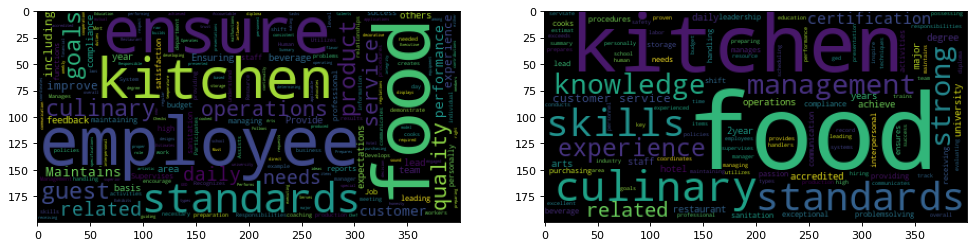

In [68]:
wcjd=WordCloud().generate(jobdesc)
wcres=WordCloud().generate(resume)

plt.figure(figsize=(15,9),dpi=80)
plt.subplot(2,2,1)
plt.imshow(wcjd)
plt.subplot(2,2,2)
plt.imshow(wcres)
plt.savefig('wordcloud.png')